# Decision tree classification

Here we explore the behaviour of a decision tree, applied on a classification task.

First, some imports.

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

Let us generate the 2-dimensional data we will use for this exercise. In case you are not already familiar with `numpy` arrays (which is not a requirement, so don't worry), but you want to understand them better, have a look at the [Numpy quickstart](https://numpy.org/doc/stable/user/quickstart.html). For this particular exercise we will not need to manipulate arrays, so you can also just run the code below and leave it for later.
The function below samples data from two normal distributions -- one for each class -- which are separated by the `separation` argument.

In [2]:
rng = np.random.default_rng()
def random_data(num_positive: int, num_negative: int, separation: float = 1.0):
    """
    num_positive: The number of positive samples to generate
    num_negative: The number of negative samples to generate
    separation: The spatial separation between the classes
    """
    x_pos = rng.normal(loc=-separation, scale=0.75, size=(num_positive, 2))
    y_pos = [1.0] * num_positive

    x_neg = rng.normal(loc=separation, scale=0.75, size=(num_negative, 2))
    y_neg = [0.0] * num_negative

    x = np.concatenate((x_pos, x_neg), axis=0)
    y = np.concatenate((np.array(y_pos), np.array(y_neg)), axis=0)

    x, y = sklearn.utils.shuffle(x, y)

    return (x, y)

Run the function to generate some data, and plot is to see what it looks like.

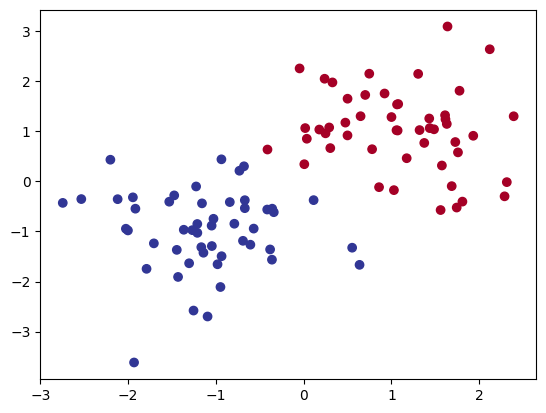

In [3]:
X, Y = random_data(50, 50, separation=1.0)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='RdYlBu')

Excellent. Based on the their spatial position, we should be able to classify the data points belonging to the negative and the positive class, respectively.

We will use a CART model, which is implemented in `sklearn.tree` as [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). To build the tree according to the training data, we need to call `fit(data, labels)`.

In order to visualise the results of the decision tree, we want to plot the *decision boundary*. Data points on one side of the decision boundary as classified as the positive class, while data points on the other side are classified as the negative class.

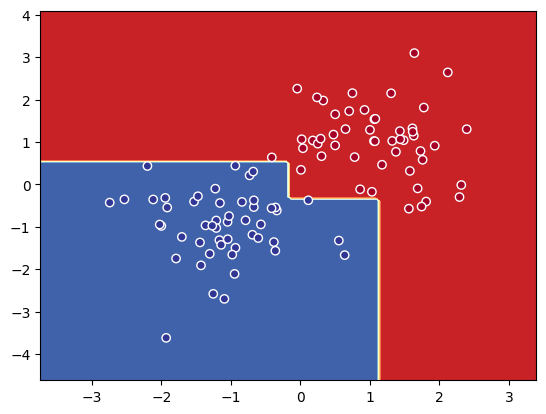

In [4]:
from sklearn import tree
from sklearn import inspection

# Build the tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X, Y)

# Plot the decision surface
inspection.DecisionBoundaryDisplay.from_estimator(
    dt,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict"
)

# Plot the training data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='RdYlBu', edgecolors='w')

## Exercises
Now, for the actual exercises, we want to build understanding by playing around with a) the data, and b) the model.

1. Recreate the data with either very big separation between the classes, or very small, and observe how the decision surface changes.
2. In the documentation for [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), lots of options are described. You'll noticed that we have already specified a non-default `criterion`. Try changing the other parameters, and again observe how the results differ. In particular, try setting `max_depth` and `min_samples_split` to small or big values.
3. Generate some separate **test data**, and plot those too. Does the default decision tree parameters give good results on the test data? Can you find better parameters to improve the class prediction for this example?
4. Finally, print out the splitting thresholds and the leaf contents for the entire tree, using the code snippet below. Does it equal your expectation from looking at the decision boundary?

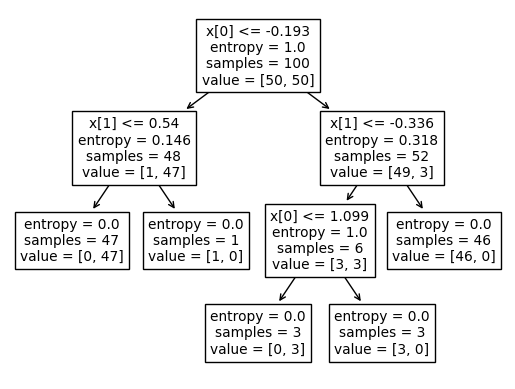

In [5]:
tree.plot_tree(dt)
plt.show()

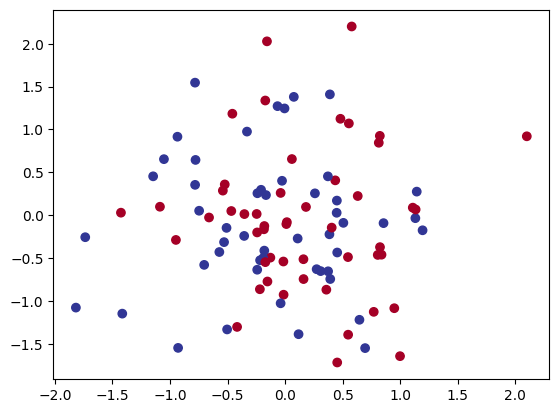

In [8]:
X, Y = random_data(50, 50, separation=0.1)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='RdYlBu')

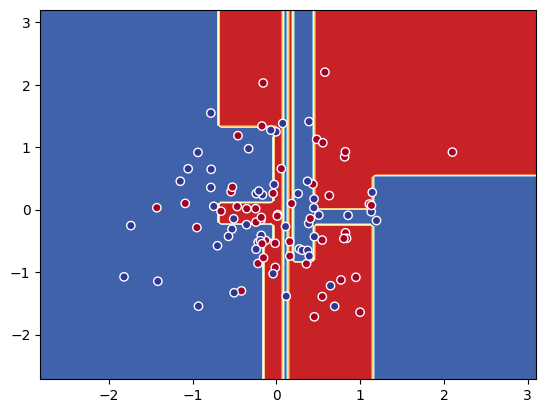

In [22]:
from sklearn import tree
from sklearn import inspection

# Build the tree
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=10)
dt.fit(X, Y)

# Plot the decision surface
inspection.DecisionBoundaryDisplay.from_estimator(
    dt,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict"
)

# Plot the training data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='RdYlBu', edgecolors='w')

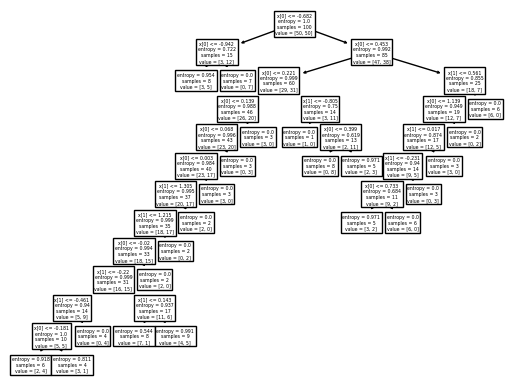

In [23]:
tree.plot_tree(dt)
plt.show()
